In [2]:
import cryovesnet
import matplotlib.pyplot as plt
from skimage.color import label2rgb
import numpy as np

In [3]:
dataset_directory = "/mnt/data/amin/Handpicked/84/"

pl2 = cryovesnet.Pipeline(dataset_directory)
pl2.network_size=64
pl2.setup_cryovesnet_dir()
pl2.set_array('image')
pl2.set_array('deep_mask')
pl2.set_array('deep_labels')
pl2.set_array("sphere_labels")
pl2.set_array("convex_labels")

CryoVesNet Pipeline: the pipeline is created for /mnt/data/amin/Handpicked/84
CryoVesNet Pipeline: setting up cryovesnet directory


'convex_labels'

In [4]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [5]:
def imshow(*args,**kwargs):
    plt.figure(figsize=(8, 6), dpi=None)
    frame1 = plt.gca()
    frame1.axes.xaxis.set_visible(False)
    frame1.axes.yaxis.set_visible(False)
    frame1.set_axis_off()
    plt.imshow(*args,**kwargs)


(1366, 894)


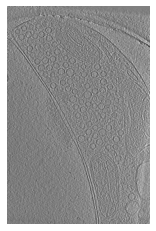

In [12]:
layer = 204
image= pl2.image[layer]
mask= pl2.deep_mask[layer]
labels= pl2.deep_labels[layer]
spheres= pl2.sphere_labels[layer]
convex= pl2.sphere_labels[layer]




print(image.shape)
fig = plt.figure()
ax= fig.add_subplot(111)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_axis_off()
ax.imshow(image,cmap='gray')
plt.show()

In [13]:
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
# data = data.reshape(fig.canvas.get_width_height()[::-1] + (1,))
data.shape[0]/image.shape[0]

79.14202049780381

In [32]:
import io

# imshow(image,cmap='gray')
io_buf = io.BytesIO()
fig=plt.gcf()
fig.savefig(io_buf, format='raw',dpi=None)
io_buf.seek(0)
img_arr = np.reshape(np.frombuffer(io_buf.getvalue(), dtype=np.uint8),
                     newshape=(int(fig.bbox.bounds[3]), int(fig.bbox.bounds[2]), -1))
io_buf.close()

<Figure size 432x288 with 0 Axes>

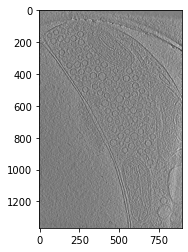

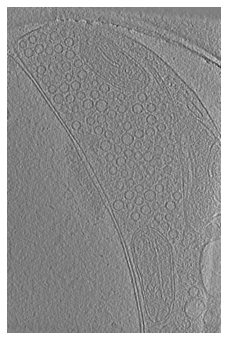

In [36]:
from skimage.color import rgb2gray , rgba2rgb
image=pl2.image[204]
plt.imshow(image,cmap='gray')
image=(image-image.min())/(image.max()-image.min())
x= (plt.cm.gray(image))
y=rgb2gray(rgba2rgb(x))
# plt.imshow(image,cmap='gray')
imshow(y,cmap='gray')

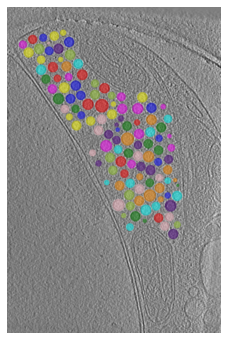

In [34]:
image_label_overlay = label2rgb(convex, image=y, bg_label=0 , bg_color=None,alpha=0.5)
# plt.gca().imshow(image_label_overlay)
imshow(image_label_overlay)

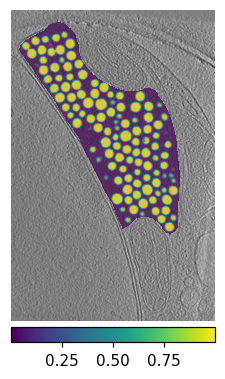

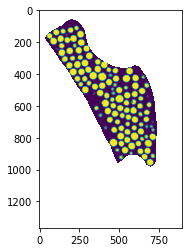

In [31]:
# imshow(mask,cmap=parula_map)



from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable




plt.ioff()
khar=mask.copy()
p,q = np.where(mask==0)
khar[p,q]=None
fig = plt.figure(frameon=False,dpi=110)
fig2 = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = fig2.add_subplot(111)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('bottom', size='5%', pad=0.05)

ax1.imshow(image,cmap='gray')
# frame1 = plt.gca()
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax1.set_axis_off()
fig.colorbar(im, orientation="horizontal",cax=cax)

cmapo= 'viridis'
# cmapo = parula_map
ax1.imshow(khar,cmap=cmapo,alpha=0.7)
im = ax2.imshow(khar,cmap=cmapo,alpha=1.0)


# plt.colorbar()

plt.show()

In [ ]:

plt.ioff()
khar=mask.copy()
p,q = np.where(mask==0)
khar[p,q]=None
fig = plt.figure(frameon=False)

plt.imshow(image,cmap='gray')
plt.imshow(khar,cmap= 'red',alpha=0.9)
plt.colorbar()


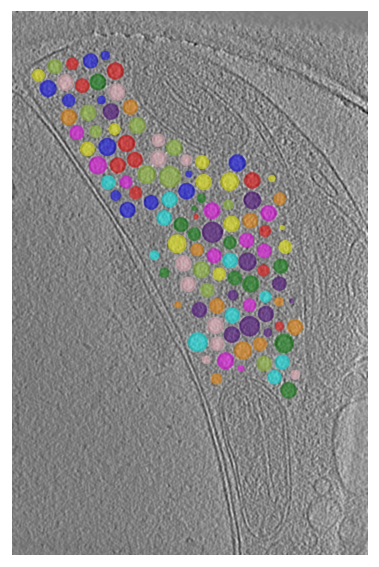

In [188]:
image_label_overlay = label2rgb(spheres, image=y, bg_label=0 , bg_color=None,alpha=0.5)
# plt.gca().imshow(image_label_overlay)
imshow(image_label_overlay)

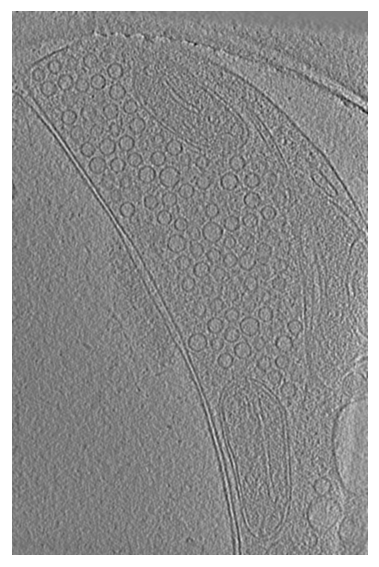

In [189]:
image_label_overlay = label2rgb(mask, image=y, bg_label=0 , bg_color=None,alpha=0.5)
# plt.gca().imshow(image_label_overlay)
imshow(image_label_overlay)